# Modeling

This notebook begins the modeling process. 3 algorithms are compared and the best one is optimized using hyperparameter tuning.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('Data/X_train_v2.csv',index_col = 0)
X_test = pd.read_csv('Data/X_test_v2.csv',index_col = 0)
y_train = pd.read_csv('Data/y_train_v2.csv',index_col = 0)
y_test = pd.read_csv('Data/y_test_v2.csv',index_col = 0)

## Linear Regression

In [3]:
lr = LinearRegression()

lr_fit_start = time.time()
lr.fit(X_train,y_train['favorites'])
lr_fit_end = time.time()
lr_fit_time = lr_fit_end - lr_fit_start

lr_pred_start = time.time()
lr_pred = lr.predict(X_test)
lr_pred_end = time.time()
lr_pred_time = lr_pred_end - lr_pred_start

mse_lr_test = mean_squared_error(y_test['favorites'],lr_pred)
mse_lr_train = mean_squared_error(y_train['favorites'],lr.predict(X_train))

print('The train mse for the linear regression model is ' + str(round(mse_lr_train,3)))
print('The test mse for the linear regression model is ' + str(round(mse_lr_test,3)))
print('The model fitting time is ' + str(round(lr_fit_time,3)))
print('The model prediction time is ' + str(round(lr_pred_time,3)))

The train mse for the linear regression model is 3078481.255
The test mse for the linear regression model is 3491299.105
The model fitting time is 1.36
The model prediction time is 0.005


Determine whether to use favorites or retweets as the variable to predict with the model:

In [4]:
lr2 = LinearRegression()
lr2.fit(X_train,y_train['retweets'])
print('R2 using favorites: ' + str(lr.score(X_test,y_test['favorites'])) + '\nR2 using retweets: ' + str(lr2.score(X_test,y_test['retweets'])))

R2 using favorites: 0.27644714055389574
R2 using retweets: 0.15593006719209757


The R2 value for favorites is higher so I will proceed with favorites as the output variable.

## KNN

In [5]:
knn = KNeighborsClassifier()

knn_fit_start = time.time()
knn.fit(X_train,y_train['favorites'])
knn_fit_end = time.time()
knn_fit_time = knn_fit_end - knn_fit_start

knn_pred_start = time.time()
knn_pred = knn.predict(X_test)
knn_pred_end = time.time()
knn_pred_time = knn_pred_end - knn_pred_start

mse_knn_train = mean_squared_error(y_train['favorites'],knn.predict(X_train))
mse_knn_test = mean_squared_error(y_test['favorites'],knn_pred)

print('The train mse for the KNN model is ' + str(round(mse_knn_train,3)))
print('The test mse for the KNN model is ' + str(round(mse_knn_test,3)))
print('The model fitting time is ' + str(round(knn_fit_time,3)))
print('The model prediction time is ' + str(round(knn_pred_time,3)))

The train mse for the KNN model is 4304365.629
The test mse for the KNN model is 4993206.518
The model fitting time is 0.489
The model prediction time is 4.4


## Random Forest

In [6]:
rf = RandomForestClassifier()

rf_fit_start = time.time()
rf.fit(X_train,y_train['favorites'])
rf_fit_end = time.time()
rf_fit_time = rf_fit_end - rf_fit_start

rf_pred_start = time.time()
rf_pred = rf.predict(X_test)
rf_pred_end = time.time()
rf_pred_time = rf_pred_end - rf_pred_start

mse_rf_train = mean_squared_error(y_train['favorites'],rf.predict(X_train))
mse_rf_test = mean_squared_error(y_test['favorites'],rf_pred)

print('The train mse for the random forest model is ' + str(round(mse_rf_train,3)))
print('The test mse for the random forest model is ' + str(round(mse_rf_test,3)))
print('The model fitting time is ' + str(round(rf_fit_time,3)))
print('The model prediction time is ' + str(round(rf_pred_time,3)))

The train mse for the random forest model is 1551021.994
The test mse for the random forest model is 7007460.686
The model fitting time is 76.01
The model prediction time is 27.292


## Linear Model Optimization

In [7]:
coefficients = pd.DataFrame(data=list(lr.coef_),index=X_train.columns.values,columns=['coeff'])

In [8]:
coefficients.sort_values(by='coeff',ascending=False).head(10)

,coeff
screen_name_awonderland,3948.413720
screen_name_porterrobinson,2076.353005
music,692.180187
screen_name_sanholobeats,637.239503
going,616.982964
album,569.339038
virtual,558.850753
miss,501.577474
song,417.108355
first,358.299692


In [9]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

### Hyperparameter Tuning

In [10]:
import warnings
warnings.filterwarnings("ignore")

params = {'alpha':(0.01,0.1,1),
         'l1_ratio':(0,0.5,1),
         'normalize':(True,False)}
elastic = ElasticNet()
grid = GridSearchCV(elastic,params)
grid.fit(X_train,y_train['favorites'])

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': (0.01, 0.1, 1), 'l1_ratio': (0, 0.5, 1),
                         'normalize': (True, False)})

In [11]:
grid.best_estimator_

ElasticNet(alpha=0.1, l1_ratio=1, normalize=True)

In [12]:
elastic = ElasticNet(alpha=0.1, l1_ratio=1, normalize=True)
elastic.fit(X_train,y_train['favorites'])

ElasticNet(alpha=0.1, l1_ratio=1, normalize=True)

## Final Model

Most important features:

In [13]:
coefficients = pd.DataFrame(data=list(elastic.coef_),index=X_train.columns.values,columns=['Coefficient'])
coefficients['Coefficient'] = round(coefficients['Coefficient'],2)
coefficients.index.name = 'Feature'
coefficients.sort_values(by='Coefficient',ascending=False).head(10)

,Coefficient
Feature,
screen_name_awonderland,3847.85
screen_name_porterrobinson,1988.78
music,635.84
screen_name_sanholobeats,550.35
going,519.62
album,504.00
virtual,483.02
miss,420.03
song,360.22


### Error Analysis

In [14]:
elastic_pred = elastic.predict(X_test)
mean_squared_error(y_test['favorites'],elastic_pred)

3490805.3505559377

In [15]:
predict_vs_actual = pd.DataFrame(data={'pred': elastic_pred,'actual':y_test['favorites']})
predict_vs_actual['difference'] = (predict_vs_actual['pred'] - predict_vs_actual['actual'])
predict_vs_actual['abs_difference'] = abs(predict_vs_actual['actual'] - predict_vs_actual['pred'])
predict_vs_actual.sort_values(by='abs_difference',ascending=False).head(10)

,pred,actual,difference,abs_difference
774,610.800870,40080,-39469.199130,39469.199130
5538,2862.902832,30131,-27268.097168,27268.097168
788,374.688536,19783,-19408.311464,19408.311464
476,4216.593545,21126,-16909.406455,16909.406455
10259,335.102107,17155,-16819.897893,16819.897893
5323,2376.363791,16984,-14607.636209,14607.636209
5302,2228.183567,16823,-14594.816433,14594.816433
5297,2832.280578,17382,-14549.719422,14549.719422
5614,2448.674317,16966,-14517.325683,14517.325683
5477,2221.086075,16181,-13959.913925,13959.913925


Text(0, 0.5, 'Predicted # - Actual # of Favorites')

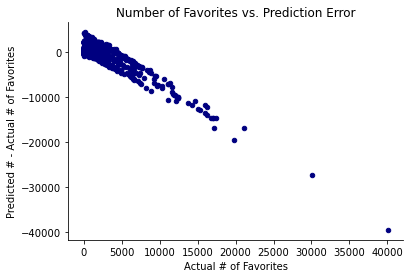

In [16]:
ax = predict_vs_actual.plot.scatter(x='actual',y='difference',color='navy')
sns.despine()
ax.set_title('Number of Favorites vs. Prediction Error')
plt.xlabel('Actual # of Favorites')
plt.ylabel('Predicted # - Actual # of Favorites')

Text(0, 0.5, 'Predicted # - Actual # of Favorites')

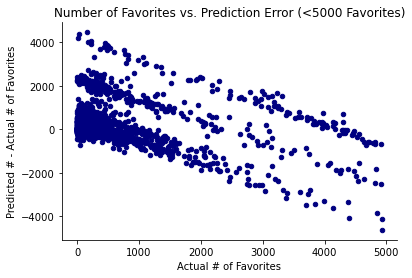

In [17]:
ax = predict_vs_actual[predict_vs_actual['actual']<5000].plot.scatter(x='actual',y='difference',color='navy')
sns.despine()
ax.set_title('Number of Favorites vs. Prediction Error (<5000 Favorites)')
plt.xlabel('Actual # of Favorites')
plt.ylabel('Predicted # - Actual # of Favorites')

In [24]:
models = ['Linear Regression','KNN','Random Forest']
train_mse = [mse_lr_train,mse_knn_train,mse_rf_train]
test_mse = [mse_lr_test,mse_knn_test,mse_rf_test]
train_time = [lr_fit_time,knn_fit_time,rf_fit_time]
pred_time = [lr_pred_time,knn_pred_time,rf_pred_time]

model_compare = pd.DataFrame({'Model':models,'Train MSE':train_mse,'Test MSE':test_mse,'Train Time':train_time,'Prediction Time':pred_time})

Table to compare the 3 initial models:

In [25]:
model_compare = round(model_compare,3)
model_compare.set_index('Model')

,Train MSE,Test MSE,Train Time,Prediction Time
Model,,,,
Linear Regression,3078481.255,3491299.105,1.360,0.005
KNN,4304365.629,4993206.518,0.489,4.400
Random Forest,1551021.994,7007460.686,76.010,27.292
